## Research Questions 
### (in progress - please contact Amelia for any additional questions you would like explored):

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df = pd.read_csv('../../data/form990_embf.csv', )
df.drop(['Unnamed: 0'], axis=1, inplace=True)

display(df.head())
display(df.shape)


/var/folders/79/jdv69xcs22z7cyxln5rsbzzh0000gn/T/ipykernel_24273/3300665107.py:1: DtypeWarning: Columns (14,46,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../data/form990_embf.csv', )


,efile,ein,tax_pd,subseccd,s501c3or4947a1cd,schdbind,politicalactvtscd,lbbyingactvtscd,subjto6033cd,dnradvisedfundscd,...,grsinc509,unreltxincls511tx509,subtotsuppinc509,netincunrelatd509,othrinc509,totsupp509,activity,ntee_cd,subsection,affiliation
0,P,426057254.0,2011-06-01,2.0,N,N,N,NaN,N,N,...,0.0,0.0,0.0,0.0,0.0,0.0,36399000.0,NaN,2.0,3.0
1,P,60891737.0,2011-10-01,5.0,N,N,N,NaN,N,N,...,0.0,0.0,0.0,0.0,0.0,0.0,232000000.0,K20,5.0,3.0
2,P,660550623.0,2011-12-01,3.0,Y,Y,N,N,N,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,S20,3.0,3.0
3,P,464039105.0,2012-06-01,3.0,Y,Y,N,N,N,N,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,P,161696098.0,2012-12-01,3.0,Y,N,N,N,N,N,...,0.0,0.0,0.0,0.0,0.0,121247.0,0.0,T21,3.0,3.0


(302568, 250)

1. Financial:
   1. What is the mean/median percentage of expenses spent on program services compared to administrative and fundraising costs? 
      1. Comes from section IX in the form but the IRS extract lacks this specific expense - may need to analyze actual 990 forms from ProPublica’s Non profit Explorer using NLP.
   2. What is the mean/median percentage of revenue comes from program specific services?
   3. What are the primary sources of **<span title="membership dues/fundraising/grants/other">contributions</span>**? 

In [108]:
# Filter dataset to section IX fields from Form 990.
df_expenses = df[[
    'accntingfees', 'advrtpromo', 'benifitsmembrs', 'compnsatncurrofcr',
    'compnsatnandothr', 'converconventmtng', 'deprcatndepletn', 'grntstogovt',
    'grnsttoindiv', 'grntstofrgngovt', 'infotech', 'insurance',
    'feesforsrvcinvstmgmt', 'legalfees', 'feesforsrvclobby', 'feesforsrvcmgmt',
    'occupancy', 'officexpns', 'othremplyeebenef', 'othrexpnsa', 'othrexpnsb',
    'othrexpnsc', 'othrexpnsd', 'othrexpnse', 'othrexpnsf', 'feesforsrvcothr',
    'othrsalwages', 'pymtoaffiliates', 'payrolltx', 'pensionplancontrb',
    'profndraising', 'royaltsexpns', 'totfuncexpns', 'travel',
    'travelofpublicoffcl','lessdirfndrsng']] 

In [109]:
# Sum all fields that may add up to the Total functional expenses field (totfuncexpns)
columns_to_sum = df_expenses.columns.drop(['totfuncexpns','lessdirfndrsng'])
df_expenses.loc[:, 'sum_expenses'] = df_expenses[columns_to_sum].sum(axis=1) 


# Create cols by summing categorical expenses.
df_expenses.loc[:, 'mission_related'] = df_expenses[['grntstogovt','grnsttoindiv','grntstofrgngovt','converconventmtng']].sum(axis=1)
df_expenses.loc[:, 'admin_general'] = df_expenses[['compnsatncurrofcr','officexpns','insurance','occupancy','accntingfees','legalfees','feesforsrvcmgmt','feesforsrvcinvstmgmt','othrsalwages','payrolltx','pensionplancontrb','othremplyeebenef','infotech','compnsatnandothr','travelofpublicoffcl','benifitsmembrs']].sum(axis=1)
df_expenses.loc[:, 'fundraising'] = df_expenses[['profndraising','advrtpromo','lessdirfndrsng']].sum(axis=1)
df_expenses.loc[:, 'other'] = df_expenses[['deprcatndepletn','feesforsrvclobby','pymtoaffiliates','royaltsexpns','travel','infotech','othrexpnsa','othrexpnsb','othrexpnsc','othrexpnsd','othrexpnse','othrexpnsf','feesforsrvcothr']].sum(axis=1)

df_expenses[['totfuncexpns','sum_expenses','mission_related','admin_general','fundraising','profndraising','lessdirfndrsng','other']].head()

/var/folders/79/jdv69xcs22z7cyxln5rsbzzh0000gn/T/ipykernel_24273/3696841582.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_expenses.loc[:, 'sum_expenses'] = df_expenses[columns_to_sum].sum(axis=1)
/var/folders/79/jdv69xcs22z7cyxln5rsbzzh0000gn/T/ipykernel_24273/3696841582.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_expenses.loc[:, 'mission_related'] = df_expenses[['grntstogovt','grnsttoindiv','grntstofrgngovt','converconventmtng']].sum(axis=1)
/var/folders/79/jdv69xcs22z7cyxln5rsbzzh0000g

,totfuncexpns,sum_expenses,mission_related,admin_general,fundraising,profndraising,lessdirfndrsng,other
0,111612.0,59800.0,0.0,10319.0,0.0,0.0,0.0,49481.0
1,418192.0,397988.0,5067.0,99694.0,23347.0,0.0,0.0,269880.0
2,50024.0,50024.0,0.0,30394.0,2844.0,0.0,0.0,16786.0
3,934072.0,930214.0,0.0,736657.0,0.0,0.0,0.0,193557.0
4,13052.0,13052.0,0.0,4528.0,0.0,0.0,0.0,8524.0


In [110]:
# what % of sum_expenses = to total expenses
equal_rows = (df_expenses['totfuncexpns'] == df_expenses['sum_expenses']).sum()
total_rows = df_expenses.shape[0]
percentage = (equal_rows / total_rows) * 100
percentage

74.51349779223183

In [97]:
# Pie chart for mean and median expense category breakdowns
mean_mission_exp = df_expenses['mission_related'].mean()
mean_admin_exp = df_expenses['admin_general'].mean()
mean_fundraising_exp = df_expenses['fundraising'].mean()
mean_other_exp = df_expenses['other_general'].mean()


993684.9652144312

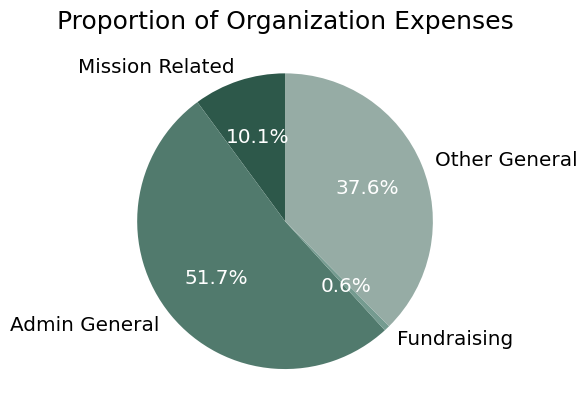

In [122]:
import matplotlib.pyplot as plt

#  mean values
mean_mission_exp = df_expenses['mission_related'].mean()
mean_admin_exp = df_expenses['admin_general'].mean()
mean_fundraising_exp = df_expenses['fundraising'].mean()
mean_other_exp = df_expenses['other'].mean()

sizes = [mean_mission_exp, mean_admin_exp, mean_fundraising_exp, mean_other_exp]
labels = ['Mission Related', 'Admin General', 'Fundraising', 'Other General']
colors = ['#2D584A', '#517A6D', '#759B90', '#96ACA5']  # Custom colors


# Create the pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%',
                                  startangle=90, colors=colors, textprops={'size': 'x-large'})

# fig, ax = plt.subplots()
# ax.pie(sizes, labels=labels, autopct='%1.1f%%',startangle=90, colors=colors) 

plt.setp(autotexts, color='white', size='x-large')
plt.title('Proportion of Organization Expenses',fontsize=18)



# Show the pie chart
plt.show()



1. Impact:
   1. What proportion of nonprofits engage in grantmaking, and what are their patterns of distribution?
   2. What is the impact of the programs run by these organizations, and how effectively are they using their funds?
      1. Comes from Section III in the form but the IRS extract lacks this info. What's the best way to look into this?

In [65]:
df_grants_binary = df[['rptgrntstoindvcd','rptgrntstogovtcd']]

df_grants_binary = df_grants_binary[(df_grants_binary['rptgrntstoindvcd']=='Y') | (df_grants_binary['rptgrntstogovtcd']=='Y')]
orgs_that_grant = df_grants_binary.value_counts().sum()
total_orgs = df.shape[0]
proportion = (orgs_that_grant / total_orgs)*100
print(f"{proportion}% of nonprofits engage in grantmaking")

21.237209486793052% of nonprofits engage in grantmaking


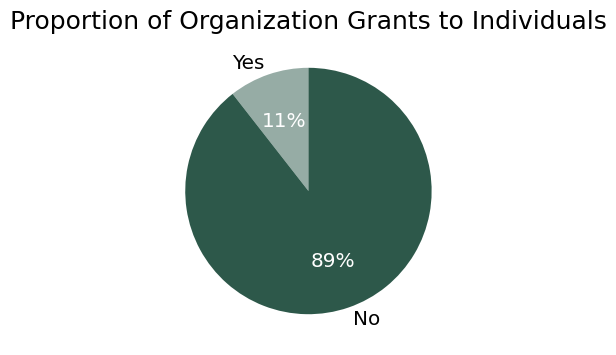

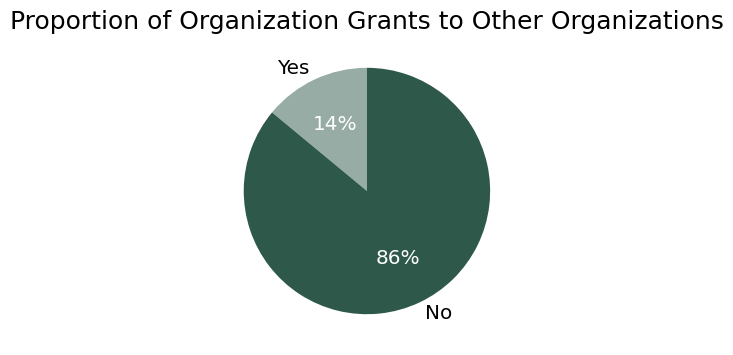

In [8]:
in_grants_ct = df['rptgrntstoindvcd'].value_counts()


Individuals = df['rptgrntstoindvcd'].value_counts().loc[['Y', 'N']]
Organizations = df['rptgrntstogovtcd'].value_counts().loc[['Y', 'N']]

custom_labels = ['Yes', 'No']
labels_ordered = [custom_labels[i] for i in range(len(in_grants_ct))]

pichart_dfs = [Individuals, Organizations]
labels = ['Grants to Individuals', 'Grants to Other Organizations']

# Generate pie charts
for data, label in zip(pichart_dfs, labels):
    plt.figure(figsize=(6, 4))
    _, _, autotexts = plt.pie(data, labels=custom_labels, autopct='%1.0f%%', startangle=90, colors=['#96ACA5', '#2D584A'], textprops={'size': 'x-large'})
    for ins in autotexts:
        ins.set_color('white')
    plt.title(f'Proportion of Organization {label}', fontsize=18)
    plt.show()

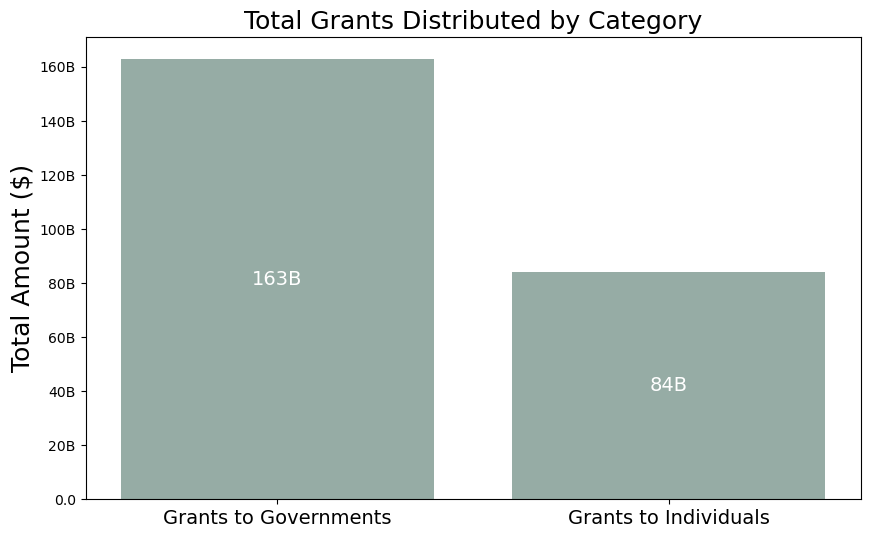

In [19]:
# Create function for abreviated value labels.
from matplotlib.ticker import FuncFormatter

def human_readable(x, pos):
    if x >= 1e12:  # Trillions
        s = f'{x / 1e12:.0f}T'
    elif x >= 1e9:  # Billions
        s = f'{x / 1e9:.0f}B'
    elif x >= 1e6:  # Millions
        s = f'{x / 1e6:.0f}M'
    elif x >= 1e3:  # Thousands
        s = f'{x / 1e3:.0f}K'
    else:
        s = str(x)
    return s
formatter = FuncFormatter(human_readable)

categories = ['Grants to Governments', 'Grants to Individuals']
values = [df['grntstogovt'].sum(), df['grnsttoindiv'].sum()]

plt.figure(figsize=(10, 6))
bars = plt.bar(categories, values, color='#96ACA5')

for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval/2, f'{human_readable(yval, None)}',  # Use human_readable for label
             ha='center', va='center', color='white', fontsize=14)

plt.title('Total Grants Distributed by Category',fontsize=18)
plt.ylabel('Total Amount ($)',fontsize=18)
plt.xticks(fontsize=14)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

3. Temporal:
   1. How financially stable are philanthropic organizations over time?